# Linear regression assignment

Please construct a linear regression model for the following dataset:

https://drive.google.com/file/d/1BCoufZfhyTwAtRcewaBPcEbBR4jPGT2C/view?usp=sharing

- You shoud visualize the dataset with scatterlot and the resulting line.
- send me .ipynb files.



- btw: moodle was not working properly on Monday. I am extending the desdline of assignment.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

In [72]:
ex1 = pd.read_csv('ex1data1.txt', names = ['population', 'profit'])
ex1.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [73]:
ex1.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [74]:
y = ex1[['population']]
X = ex1[['profit']]
model_lr = LinearRegression().fit(X, y)
model_lr

LinearRegression()

In [75]:
model_lr.coef_

array([[0.58844238]])

In [76]:
model_lr.intercept_

array([4.72380549])

In [77]:
model_lr.predict(ex1[['population']])

c:\Users\Beksultan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- population
Feature names seen at fit time, yet now missing:
- profit

  warnings.warn(message, FutureWarning)


array([[ 8.31924726],
       [ 7.97653842],
       [ 9.73651072],
       [ 8.84478515],
       [ 8.17196013],
       [ 9.65665909],
       [ 9.12323608],
       [ 9.77152305],
       [ 8.54056044],
       [ 7.69814633],
       [ 8.08422337],
       [13.05850332],
       [ 8.09793408],
       [ 9.67166437],
       [ 8.04303241],
       [ 7.88927241],
       [ 8.4694766 ],
       [ 7.74257373],
       [ 8.5072546 ],
       [ 8.88456385],
       [ 8.36573421],
       [16.65153248],
       [ 7.95441298],
       [ 8.44635081],
       [ 7.99842847],
       [15.87184633],
       [12.2723443 ],
       [11.17136862],
       [12.47712225],
       [17.78899159],
       [ 7.81454023],
       [ 8.60128769],
       [10.16583828],
       [ 8.19079029],
       [ 9.55556469],
       [ 9.39215424],
       [ 9.48777613],
       [ 8.02278999],
       [12.27705184],
       [ 8.46241529],
       [ 7.90545458],
       [ 8.77376015],
       [11.61328884],
       [ 8.12129524],
       [ 9.32819056],
       [ 8

In [78]:
model_lr.predict(ex1[['profit']])

array([[15.07568379],
       [10.09640208],
       [12.76310525],
       [11.69920143],
       [ 8.73892436],
       [11.71803159],
       [ 7.28252948],
       [11.78511402],
       [ 8.6067602 ],
       [ 6.96965467],
       [ 6.63753779],
       [13.84760455],
       [ 6.58040003],
       [ 8.97577242],
       [ 5.14523615],
       [ 6.79094472],
       [ 7.84537461],
       [ 5.05378632],
       [ 6.87267936],
       [ 7.89509799],
       [ 6.57069073],
       [17.53243072],
       [ 7.23233534],
       [ 7.77635032],
       [ 6.53767912],
       [18.04496403],
       [12.66836602],
       [ 8.87038239],
       [13.3692009 ],
       [18.93292357],
       [ 4.00590579],
       [ 8.25245905],
       [11.8639653 ],
       [ 5.81212967],
       [ 8.57374859],
       [ 7.40845615],
       [ 7.14606969],
       [ 6.72027279],
       [10.67707702],
       [ 7.95870861],
       [ 5.05131486],
       [ 7.02549785],
       [ 7.89280307],
       [ 6.15995795],
       [ 8.68508188],
       [ 5

In [79]:
r2_score(y_true = model_lr.predict(ex1[['profit']]),
         y_pred = model_lr.predict(ex1[['population']]))

c:\Users\Beksultan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- population
Feature names seen at fit time, yet now missing:
- profit

  warnings.warn(message, FutureWarning)


0.5044350699268638

<AxesSubplot: xlabel='population', ylabel='profit'>

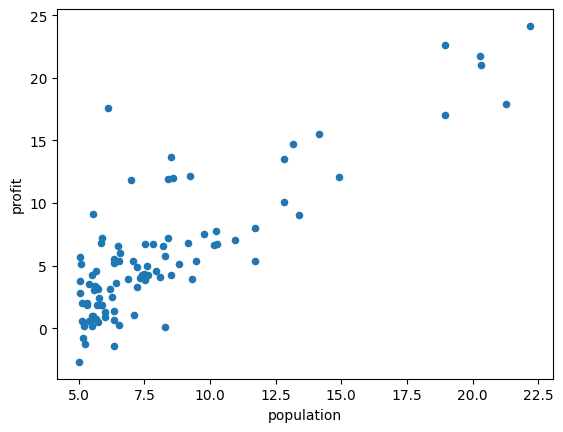

In [80]:
ex1.head()
ex1.plot.scatter(x=0,y=1)

In [83]:
data = ex1.iloc[:,0].values
y = ex1.iloc[:,1].values

if len(data.shape) < 2:
    data = data.reshape(-1,1)
    
ones = np.ones(data.shape[0])
X = np.c_[data,ones]

In [84]:
def NormalEquation(X,y):
    transfer = X.T
    return np.dot(np.dot(np.linalg.pinv(np.dot(transfer,X)) , transfer) , y)

In [85]:
theta = NormalEquation(X,y)
theta

array([ 1.19303364, -3.89578088])

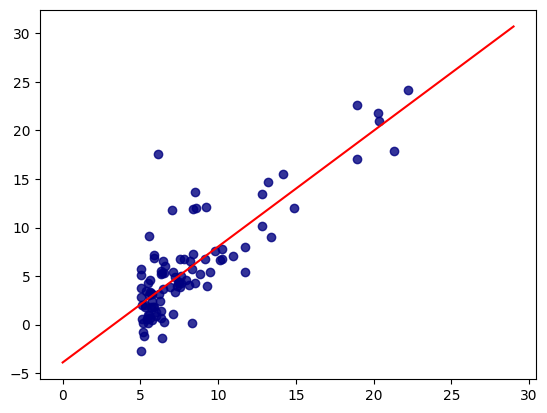

In [86]:
def predect(test_data,theta):
    ones = np.ones(test_data.shape[0])
    test_data = np.c_[test_data,ones]
    return np.dot(test_data,theta)

plt.scatter(data,y, alpha=.8, color='navy')
y_pred = predect(np.arange(30),theta)
plt.plot(y_pred,color='red')

In [87]:
def featureNormalize(X):
    (m,n) = X.shape
    X_norm = X
    mu = np.zeros(n)
    sigma = np.zeros(n)

    for i in range(n):
        
        mu[i] = np.mean(X[:,i])
        sigma[i] = np.std(X[:,i])

        X_norm[:,i] = (X_norm[:,i]-mu[i])/sigma[i]
        
    return X_norm


data_Normalize = featureNormalize(data)

ones = np.ones(data.shape[0])
X = np.c_[data_Normalize,ones]

In [89]:
def computeCost(X, y, theta):
    return np.sum((np.dot(X,theta) -y)**2)/(2*len(y))

In [90]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)

    theta_len = len(theta)

    for num_iter in range(num_iters):
        theta = theta - (alpha/m)*np.dot(X.T,(np.dot(X,theta).reshape(-1)-y))
        J_history[num_iter] = computeCost(X, y, theta)
        
    return theta, J_history

[4.5105935  5.73431935]


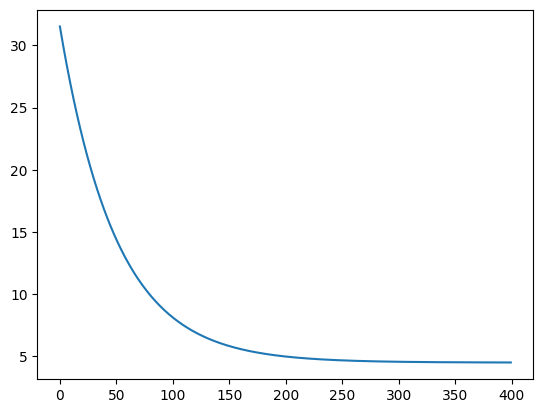

In [91]:
alpha = 0.01
num_iters = 400
theta = np.zeros(data.shape[1]+1)

theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)
print(theta)
plt.plot(J_history)

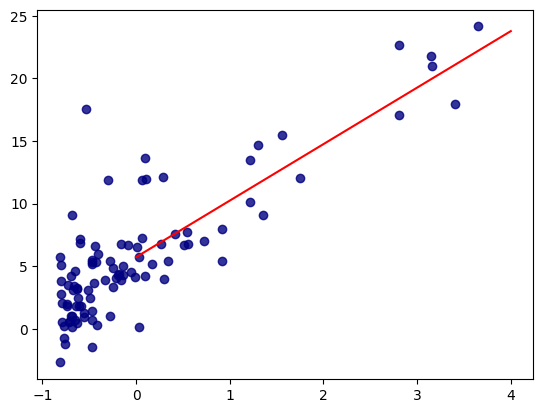

In [92]:
def predect(test_data,theta):
    ones = np.ones(test_data.shape[0])
    test_data = np.c_[test_data,ones]
    return np.dot(test_data,theta)

plt.scatter(data,y, alpha=.8, color='navy')
y_pred = predect(np.arange(5),theta)
plt.plot(y_pred,color='red')

In [93]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

model = reg.fit(data,y)